<a href="https://colab.research.google.com/github/Ajay0110/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.formula.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Connecting Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Setting up path to the csv file

In [3]:
taxi_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EDA/Regression EDA Capstone Project/NYC Taxi Data.csv")

### Checking the shape of the dataset

In [4]:
taxi_df.shape

(1458644, 11)

### As we can see there are 1458644 rows and 11 columns.

### Dataframe's Head and Tail

In [5]:
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
taxi_df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


### Checking for null values

In [7]:
taxi_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### As we can see there are no null or NaN values. Now checking for datatypes.

In [8]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


We have 3 variables of object type namely pickup_datetime,dropoff_datetime and store_and_fwd_flag.

Converting pickup and dropoff from object to datetime datatype

In [9]:
taxi_df['pickup_datetime'] = pd.to_datetime(taxi_df['pickup_datetime'])
taxi_df['dropoff_datetime'] = pd.to_datetime(taxi_df['dropoff_datetime'])
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


### From datetime variables we will be able to derive whether the pickup and drop was done in the morning, afternoon, evening and at night. For that we need to derive hour and classify them accordingly. 

In [10]:
taxi_df['picked_up_hour']=taxi_df.pickup_datetime.dt.hour
taxi_df['dropped_hour'] = taxi_df.dropoff_datetime.dt.hour
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,picked_up_hour,dropped_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,12
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,13


### As we can see the hours are in 24hr format. Creating a function to classify them.

In [11]:
def times_of_the_day(hr):
  if hr in range(6,12):
    return 'Morning'
  elif hr in range(12,16):
    return 'Afternoon'
  elif hr in range(16,20):
    return 'Evening'
  else:
    return 'Night'

In [12]:
taxi_df['pickup_tod'] = taxi_df['picked_up_hour'].apply(times_of_the_day)
taxi_df['drop_tod'] = taxi_df['dropped_hour'].apply(times_of_the_day)
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,picked_up_hour,dropped_hour,pickup_tod,drop_tod
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,17,Evening,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,0,Night,Night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,12,Morning,Afternoon
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,19,Evening,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,13,Afternoon,Afternoon


### We can get the name of the day and month as well as year.

In [13]:
taxi_df['picked_up_day']=taxi_df.pickup_datetime.dt.day_name()
taxi_df['dropped_day']=taxi_df.dropoff_datetime.dt.day_name()
taxi_df['month']=taxi_df.pickup_datetime.dt.month_name()
taxi_df['year']=taxi_df.pickup_datetime.dt.year
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,picked_up_hour,dropped_hour,pickup_tod,drop_tod,picked_up_day,dropped_day,month,year
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,17,Evening,Evening,Monday,Monday,March,2016
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,0,Night,Night,Sunday,Sunday,June,2016
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,12,Morning,Afternoon,Tuesday,Tuesday,January,2016
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,19,Evening,Evening,Wednesday,Wednesday,April,2016
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,13,Afternoon,Afternoon,Saturday,Saturday,March,2016


By importing great_circle from geopy.distance we can calculate distance using co-ordinates

In [14]:
from geopy.distance import great_circle
def dist_calc(lat1,long1,lat2,long2):
  pickup = (lat1,long1)
  drop = (lat2,long2)
  return great_circle(pickup,drop).km

# Creating distance variable
taxi_df['distance'] = taxi_df.apply(lambda x: dist_calc(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)


In [15]:
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,picked_up_hour,dropped_hour,pickup_tod,drop_tod,picked_up_day,dropped_day,month,year,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,17,Evening,Evening,Monday,Monday,March,2016,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,0,Night,Night,Sunday,Sunday,June,2016,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,12,Morning,Afternoon,Tuesday,Tuesday,January,2016,6.385108
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,19,Evening,Evening,Wednesday,Wednesday,April,2016,1.485501
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,13,Afternoon,Afternoon,Saturday,Saturday,March,2016,1.188590


Using the distance and trip duration we can calculate speed.
Formula for speed is
speed = distance/timetaken

In [16]:
taxi_df['speed'] = (taxi_df.distance/(taxi_df.trip_duration/3600))

In [17]:
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,picked_up_hour,dropped_hour,pickup_tod,drop_tod,picked_up_day,dropped_day,month,year,distance,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,17,17,Evening,Evening,Monday,Monday,March,2016,1.498523,11.856445
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,0,0,Night,Night,Sunday,Sunday,June,2016,1.805510,9.803673
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,11,12,Morning,Afternoon,Tuesday,Tuesday,January,2016,6.385108,10.822216
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,19,19,Evening,Evening,Wednesday,Wednesday,April,2016,1.485501,12.465739
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,13,13,Afternoon,Afternoon,Saturday,Saturday,March,2016,1.188590,9.836608


### Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


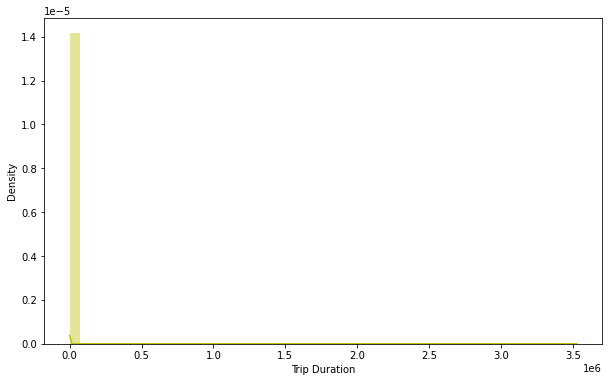

In [19]:
# Dependent variable is trip duration
plt.figure(figsize = (10,6))
sns.distplot(taxi_df['trip_duration'], color='y')
plt.xlabel('Trip Duration')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


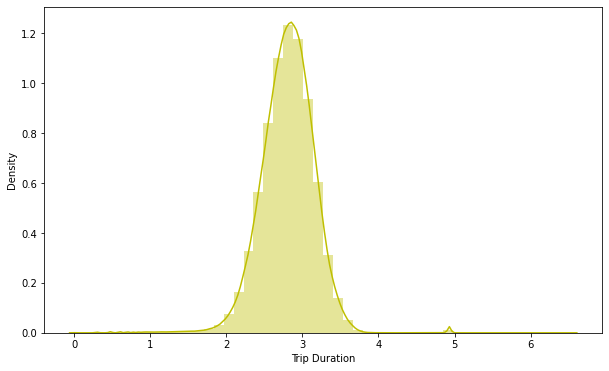

In [20]:
#Performing np.log10 transformation since the above graph is right skewed
plt.figure(figsize = (10,6))
sns.distplot(np.log10(taxi_df['trip_duration']), color='y')
plt.xlabel('Trip Duration')
plt.show()

Now the graph has normal distribution

In [21]:
taxi_df['trip_duration'].sort_values(ascending=False)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
            ...   
269418           1
467645           1
533799           1
726971           1
311745           1
Name: trip_duration, Length: 1458644, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


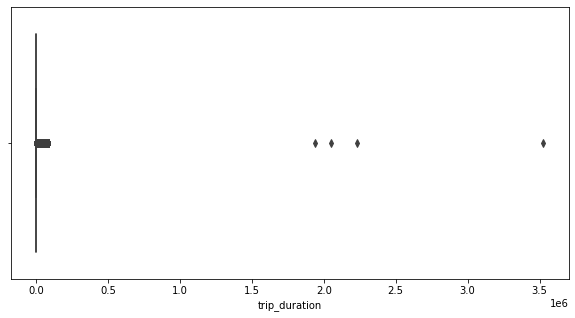

In [22]:
plt.figure(figsize = (10,5))
sns.boxplot(taxi_df.trip_duration)
plt.show()

### Removing outliers using IQR

In [23]:
Q1 = taxi_df['trip_duration'].quantile(0.25)
Q3 = taxi_df['trip_duration'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
ls = taxi_df['trip_duration'].index[(taxi_df['trip_duration'] < lower) | (taxi_df['trip_duration'] > upper)]
taxi_df = taxi_df.drop(ls)

In [24]:
taxi_df.shape

(1384424, 21)

### Trip count versus Trip Duration

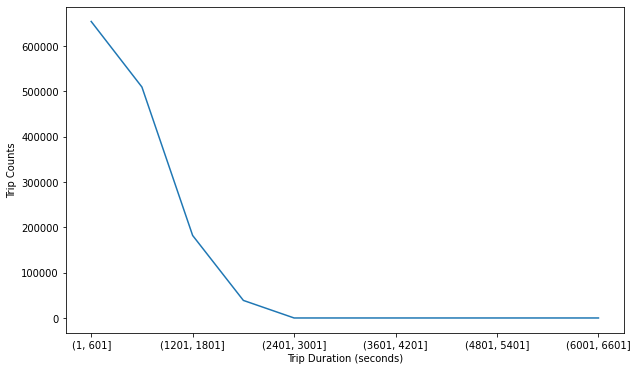

In [ ]:
plt.figure(figsize = (10,6))
taxi_df.trip_duration.groupby(pd.cut(taxi_df.trip_duration, np.arange(1,7200,600))).count().plot(kind='line')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Trip Counts' )
plt.show()

### From the above observation we can see that most of the trip duration is completed within an hour(3600 seconds). Also there are very few trips that have duration more than 5000 seconds and some are as low as 1 second(0 km distance)

In [ ]:
# Now to remove outliers i.e, trips with duration more than 5000 seconds and less than 60 seconds
taxi_df = taxi_df[taxi_df.trip_duration <= 5000]
taxi_df = taxi_df[taxi_df.trip_duration >= 60]

In [ ]:
taxi_df.shape

(1446276, 21)

### Countplot for Vendor id

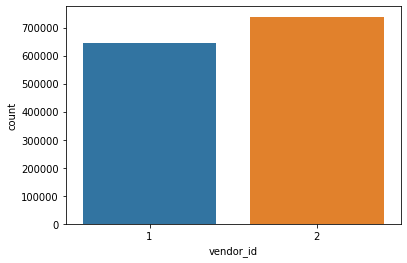

In [25]:
sns.countplot(x='vendor_id',data=taxi_df)

### There are a total 2 vendors and there is not much difference between them

# Counting under passenger variable

In [26]:
taxi_df.passenger_count.value_counts()

1    983883
2    197635
5     73864
3     56558
6     45805
4     26618
0        56
7         3
9         1
8         1
Name: passenger_count, dtype: int64

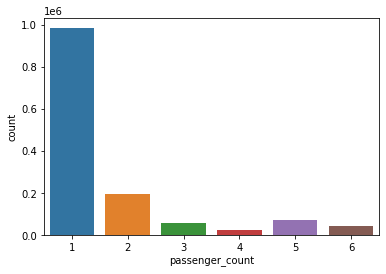

In [33]:
sns.countplot(x='passenger_count',data=taxi_df)

# As we can see there are 56 trips with 0 passengers. We need to remove it as it may be due to cancellation.
# As for passengers above 6, there is a cab called maxicab which carry upto 12 passengers, but since there are only 5 trips for above 6 passengers it doesn't make any difference. Therefore removing 0 and above 6 passenger seats.

In [31]:
taxi_df=taxi_df[taxi_df['passenger_count']!=0]
taxi_df=taxi_df[taxi_df['passenger_count']<=6]

In [32]:
taxi_df.passenger_count.value_counts()

1    983883
2    197635
5     73864
3     56558
6     45805
4     26618
Name: passenger_count, dtype: int64

# Store and Forward Flag

In [35]:
taxi_df['store_and_fwd_flag'].value_counts()

N    1377302
Y       7061
Name: store_and_fwd_flag, dtype: int64

# From Store and Forward Flag almost all the trip records were not connected to server.

# Distance count

In [36]:
taxi_df['distance'].value_counts()

0.000000    5771
0.000424      45
0.000424      43
0.000424      35
0.000424      22
            ... 
2.636133       1
1.227886       1
1.371207       1
0.480551       1
1.134044       1
Name: distance, Length: 1378212, dtype: int64

### There are around 5771 trips with 0 distance, possibly due to cancellation or there is no GPS for that location.

### Trips per times of the day

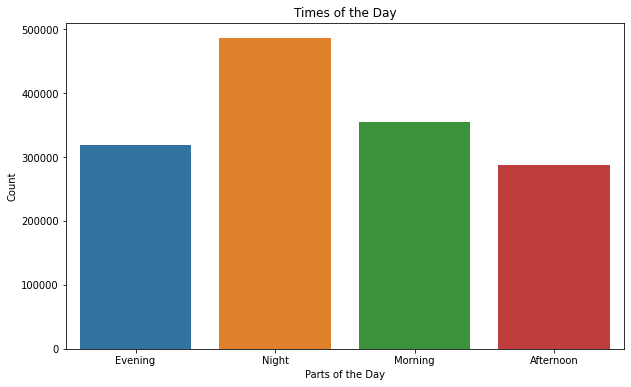

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(x="pickup_tod", data=taxi_df)
plt.title('Times of the Day')
plt.xlabel('Parts of the Day')
plt.ylabel('Count')
plt.show()

### As we can see night is the busiest and afternoon is least busy.

# Trips per Day

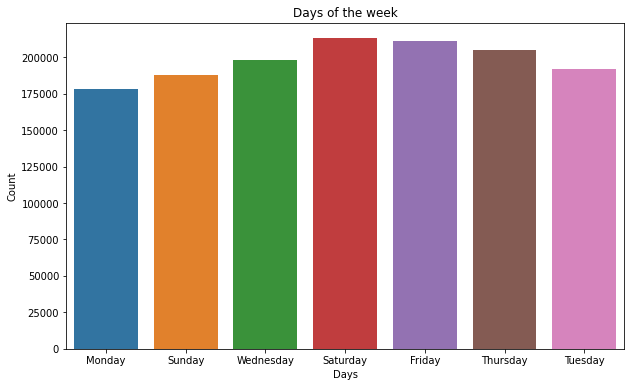

In [37]:
plt.figure(figsize = (10,6))
sns.countplot(x="picked_up_day", data=taxi_df)
plt.title('Days of the week')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

### Weekends are the busiest and Monday is the least busiest.

# Trips per Hour

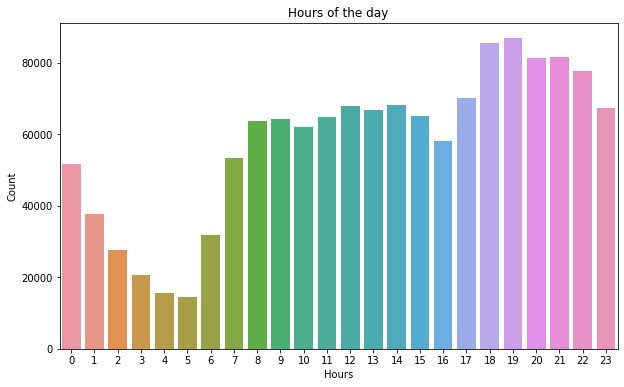

In [38]:
plt.figure(figsize = (10,6))
sns.countplot(x="picked_up_hour", data=taxi_df)
plt.title('Hours of the day')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.show()

### Peak hours are from 5PM to 8PM. Probably they are returning from work or they are returning home from wherever they have been.

# Trips per month

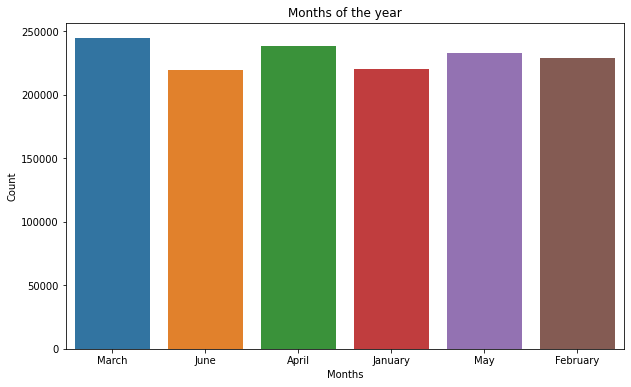

In [39]:
plt.figure(figsize = (10,6))
sns.countplot(x="month", data=taxi_df)
plt.title('Months of the year')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

In [40]:
taxi_df['year'].value_counts()

2016    1384363
Name: year, dtype: int64

### This looks like half-a-year worth of data. March seems to be significant but still there is not much difference

# Speed

In [46]:
plt.figure(figsize = (10,6))
sns.countplot(x="speed", data=taxi_df)
plt.title('Speed')
plt.xlabel('Speed')
plt.ylabel('Count')
plt.show()

KeyboardInterrupt: ignored

<Figure size 720x432 with 0 Axes>

# Bivariate Analysis

In [42]:
independent = ['vendor_id','passenger_count','store_and_fwd_flag','picked_up_hour','pickup_tod','picked_up_day','month','distance','speed']
dependent = 'trip_duration'